In [2]:
# A. Marinovich - Springboard Capstone Project - TrackML Challenge
# R jupyter notebook with markdown at Azure Notebooks: https://notebooks.azure.com/adriatic/libraries/trackml  
# Version control at GitHub repository: github.com/adriatic13/trackml

The capstone project comprises the Kaggle TrackML Particle Tracking Challenge (https://www.kaggle.com/c/trackml-particle-identification/) and related submission dataset, code and jupyter notebook. This challenges participants to "build an algorithm that quickly reconstructs particle tracks from 3D points left in the silicon detectors" in the CERN Large Hadron Collider, specifically to "group the recorded measurements or hits for each event into tracks, sets of hits that belong to the same initial particle. A solution must uniquely associate each hit to one track." The client would be the high-energy physics research community, which has demand for new algorithms to process increasing data loads from next-generation particle experiments. The training and test datasets are provided by CERN via Kaggle, and consist of 3D simulated measurements of particles resulting from proton collisions, such that the "training dataset contains the recorded hits, their ground truth counterpart and their association to particles, and the initial parameters of those particles. The test dataset contains only the recorded hits." 

The overall approach is to use machine learning algorithms to classify the detector hits into groups corresponding to the presumed particle tracks giving rise to those hits. The immediate deliverable will be the submission dataset to the Kaggle challenge, consisting of a csv file with three columns corresponding to events, hits and tracks. This will be verified against the ground truths held by the challenge administrators, and ranked accordingly. Subsequent deliverables following the challenge deadline will be the code itself embedded within a jupyter notebook. The challenge entry deadline is August 6, 2018, and the final submission deadline is August 13, 2018.

In [1]:
# the first ten training events (1000-1009) are downloaded (hits and truth files)
# the first ten test events (0-9) are downloaded (hits and cells files)
list.files()

AttributeError: type object 'list' has no attribute 'files'

In [11]:
# naming convention: r=tRaining set or s=teSt set, then event number, then ht=hits file or tr=truth file
r1000ht <- read.csv('event000001000-hits.csv')

In [12]:
str(r1000ht)

'data.frame':	120939 obs. of  7 variables:
 $ hit_id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ x        : num  -64.4 -55.3 -83.8 -96.1 -62.7 ...
 $ y        : num  -7.164 0.635 -1.143 -8.241 -9.371 ...
 $ z        : num  -1502 -1502 -1502 -1502 -1502 ...
 $ volume_id: int  7 7 7 7 7 7 7 7 7 7 ...
 $ layer_id : int  2 2 2 2 2 2 2 2 2 2 ...
 $ module_id: int  1 1 1 1 1 1 1 1 1 1 ...


In [13]:
svg('test_plot7.svg')
plot(r1000ht[1:100,2], r1000ht[1:100,3])
dev.off()

png 
  2

<img src='test_plot7.svg'>

In [14]:
# TO DO: need greater precision on numeric
r1000tr <- read.csv('event000001000-truth.csv', colClasses = c("integer", "character", "numeric", "numeric", "numeric", 
                                                               "numeric", "numeric", "numeric", "numeric"))
r1000tr <- r1000tr[order(r1000tr$particle_id, decreasing=TRUE),]
write.csv(r1000tr, file="r1000tr.csv")

In [15]:
str(r1000tr)

'data.frame':	120939 obs. of  9 variables:
 $ hit_id     : int  1382 19963 27856 34761 41048 41055 69598 69621 69683 72692 ...
 $ particle_id: chr  "99085239116103680" "99083933446045696" "99083933446045696" "99083933446045696" ...
 $ tx         : num  -109.65 17.42 22.18 19.69 6.72 ...
 $ ty         : num  38 -27.3 -68 -114.8 -170.8 ...
 $ tz         : num  -1502 -49.2 -104.6 -166.2 -240.2 ...
 $ tpx        : num  -0.93577 0.03316 0.00669 -0.02273 -0.05486 ...
 $ tpy        : num  0.262 -0.166 -0.169 -0.17 -0.164 ...
 $ tpz        : num  -11.68 -0.228 -0.228 -0.225 -0.222 ...
 $ weight     : num  0.00 1.16e-05 1.01e-05 8.52e-06 6.97e-06 ...


In [16]:
#the img src markdown below will use outdated figure, so need to remove old figure and rename to new figure
#file.remove('test_plot3.svg')
svg('test_plot8.svg')
coplot(r1000tr[1:200,3] ~ r1000tr[1:200,4] | r1000tr[1:200,2], show.given=FALSE)
dev.off()

png 
  2

<img src='test_plot8.svg'>

In [1]:
install.packages("scatterplot3d")
library(scatterplot3d)
# args(scatterplot3d)

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


In [17]:
svg('test_plot9.svg')
scatterplot3d(r1000tr[1:200,3], r1000tr[1:200,5], r1000tr[1:200,4])
dev.off()

png 
  2

<img src='test_plot9.svg'>

In [18]:
svg('test_plot10.svg')
scatterplot3d(r1000tr[1:200,3], r1000tr[1:200,5], r1000tr[1:200,4], type='l')
dev.off()

png 
  2

<img src='test_plot10.svg'>

In [5]:
# Run in Python
r1000tr_p = pd.read_csv('r1000tr.csv')
r1000tr_p.head()

,Unnamed: 0,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1382,1382,99085239116103680,-109.65300,38.0114,-1502.0000,-0.935774,0.261664,-11.680400,0.000000
1,19963,19963,99083933446045696,17.42240,-27.2568,-49.1636,0.033162,-0.166051,-0.228482,0.000012
2,27856,27856,99083933446045696,22.18140,-68.0323,-104.6020,0.006694,-0.168781,-0.228094,0.000010
3,34761,34761,99083933446045696,19.68750,-114.7670,-166.1980,-0.022731,-0.169981,-0.224740,0.000009
4,41048,41048,99083933446045696,6.71765,-170.8030,-240.2010,-0.054858,-0.164333,-0.222318,0.000007


In [17]:
# Run in Python
r1000tr_p.loc[1:2,'tx']

1    17.4224
2    22.1814
Name: tx, dtype: float64

<IPython.core.display.Javascript object>


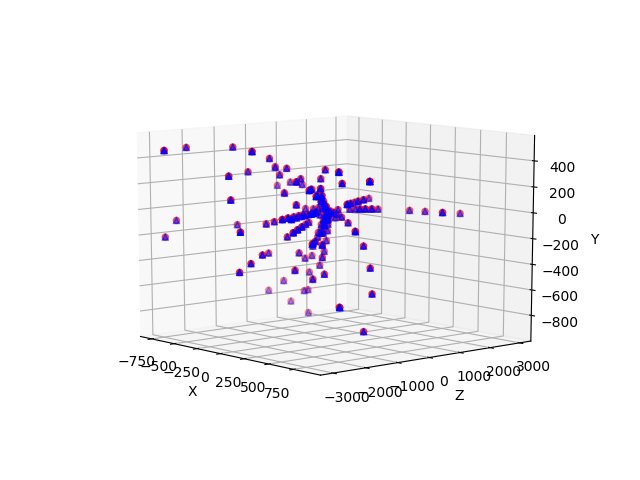

In [22]:
    # Run in Python
    # adapted from https://stackoverflow.com/questions/
    #   33436221/displaying-rotatable-3d-plots-in-ipython-or-ipython-notebook/33440743#33440743
    

    %matplotlib notebook
    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # pd.set_option('html',False)
    pd.set_option('max_columns',30)
    pd.set_option('max_rows',10)

    # Note that y and z axes are flipped for better viewing across Z axis
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = 100
    for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
        xs = r1000tr_p.loc[1:200,'tx']
        ys = r1000tr_p.loc[1:200,'tz']
        zs = r1000tr_p.loc[1:200,'ty']
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()